In [1]:
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#this code reads the csv file named train.
train = pd.read_csv("/content/train (5).csv", header=None, error_bad_lines=False)

<ipython-input-2-d9b9f3edc886>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  train = pd.read_csv("/content/train (5).csv", header=None, error_bad_lines=False)


In [3]:
#in this part, I used train.head() function to display the first 5 rows in my dataset.
train.head()

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,69769,-946,0.1613,0.7960,Panl,N,Bus2,0.0742,0,2,...,1.0,-4670.0,0.9851,0.0,0.0,Mard,0.0,0.3333,0.0,0.0
1,236977,-92,NaN,NaN,NaN,Y,Othr,NaN,0,3,...,NaN,-1994.0,NaN,NaN,0.0,Mard,0.0,NaN,0.0,0.0
2,168821,-1646,0.1124,0.8504,Panl,N,Bus3,0.0387,0,2,...,2.0,-2842.0,0.9891,0.0,0.0,Sind,0.0,0.3750,0.0,1.0
3,94708,-1651,0.0263,NaN,Blok,N,Bus3,NaN,0,2,...,4.0,-1345.0,0.9682,0.0,0.0,Sind,0.0,0.0417,0.0,1.0
4,84556,-977,NaN,NaN,NaN,N,Rest,NaN,0,2,...,NaN,-852.0,NaN,NaN,0.0,Sind,0.0,NaN,0.0,0.0


In [ ]:
train.shape

(11633, 122)

In [4]:
#I used the .isnull().sum() expression to calculate how many NaN values are in the columns in my dataset.
train.isnull().sum()

0         0
1         0
2      4061
3      4620
4      3496
       ... 
117       1
118      29
119    3414
120       1
121       1
Length: 122, dtype: int64

In [5]:
#I filled the missing values in the data set with the average values.
train = train.fillna(train.mean())
train = train.dropna()

<ipython-input-5-775922a17036>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train = train.fillna(train.mean())


In [6]:
#after filling the missing values in the data set with the average values, I check again to see if there is any missing value in the columns in my data set.
print(train.isnull().sum())

0      0
1      0
2      0
3      0
4      0
      ..
117    0
118    0
119    0
120    0
121    0
Length: 122, dtype: int64


In [7]:
#I used the train.dtypes function to display the datatypes of the columns in my dataset.
print(train.dtypes)

0        int64
1        int64
2      float64
3      float64
4       object
        ...   
117     object
118    float64
119    float64
120    float64
121    float64
Length: 122, dtype: object


In [8]:
#I used the select_dtypes() function to detect columns with string data type in my dataset.
string_columns = train.select_dtypes(include=['object'])
print(string_columns)

       4   5     6   14    16    30    31    44  47    67  69    93    103  \
0     Panl   N  Bus2  No  Unad  Come  Hout  Labs   N  Hign   F  WEDY  Cass   
2     Panl   N  Bus3  No  Spor  Worg  Hout  Labs   Y  Secl   M  TUEY  Cass   
13    Stok   N  Mede  No  Unad  Stat  Munt  Medf   Y  Secl   F  TUEY  Cass   
15    Panl   Y  Bus2  No  Unad  Come  Hout  Labs   Y  Secl   F  THUY  Cass   
20    Panl   N  Bus3  No  Spor  Worg  Hout  Salf   Y  Secl   F  MONY  Revs   
...    ...  ..   ...  ..   ...   ...   ...   ...  ..   ...  ..   ...   ...   
6960  Panl   N  Bank  No  Unad  Come  Hout  Accs   N  Hign   F  THUY  Cass   
6968  Panl   Y  Pole  No  Famy  Stat  Hout  Corf   Y  Hign   F  THUY  Cass   
6969  Stok   N  Mobe  No  Unad  Come  Wits  Higf   Y  Incr   M  FRIY  Cass   
6977  Panl   N  Othr  No  Unad  Worg  Munt  Labs   Y  Secl   M  TUEY  Cass   
6978  Stok   N  Tra1  No  Unad  Worg  Hout  Medf   N  Secl   F  MONY  Cass   

       107   110   117  
0     blos  regt  Mard  
2     blos  r

In [9]:
#I converted columns with categorical values to numeric using the fit_transform method.
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
non_numeric_columns = [4, 5, 6, 14, 16, 30, 31, 44, 47, 67, 69, 93, 103, 107, 110, 117]
label_encoder = LabelEncoder()

for col in non_numeric_columns:
    train[col] = label_encoder.fit_transform(train[col])

In [10]:
#I wrote this code to display the columns with positive correlation coefficient with our target column named 121. Columns 1 and 70 have a positive relationship with my target column.
correlation_matrix = train.corr()
positive_correlations = correlation_matrix[121][correlation_matrix[121] > 0].sort_values(ascending=False)
print(positive_correlations)

121    1.000000
69     0.080649
1      0.078804
70     0.071171
118    0.067227
67     0.059064
9      0.056847
83     0.056524
37     0.055594
50     0.055281
71     0.054976
113    0.050582
72     0.049708
28     0.045891
85     0.042798
64     0.042061
63     0.039705
112    0.034935
81     0.032873
4      0.027868
52     0.026140
79     0.024220
54     0.023603
30     0.021022
29     0.020692
11     0.019236
24     0.017791
98     0.016832
107    0.015935
44     0.012869
114    0.011162
26     0.010936
42     0.010872
80     0.008807
109    0.008555
31     0.008122
82     0.003967
3      0.002538
92     0.001912
90     0.001641
16     0.000290
Name: 121, dtype: float64


In [11]:
#I wrote this code to separate the columns in the dataset into continuous, binary, categorical and label groups.
dtypes = train.dtypes

continuous = []
binary = []
categorical = []
label = []

for col in train.columns:
    unique_values = train[col].unique()
    if len(unique_values) == 2 and set(unique_values) <= set([0, 1]):
        binary.append(col)
    elif dtypes[col] == object:
        categorical.append(col)
    else:
        continuous.append(col)

if 122 in binary:
    binary.remove(122)
    label.append(122)

In [12]:
print("Continuous variables:", len(continuous), continuous)
print("Binary variables:", len(binary), binary)
print("Categorical variables:", len(categorical), categorical)
print("Label:", len(label), label)

Continuous variables: 93 [0, 1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 21, 22, 23, 25, 27, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 48, 49, 51, 53, 54, 56, 57, 58, 59, 60, 61, 63, 65, 66, 67, 68, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 99, 101, 102, 104, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
Binary variables: 29 [5, 8, 14, 15, 20, 24, 26, 28, 29, 42, 46, 47, 50, 52, 55, 62, 64, 69, 71, 81, 97, 98, 100, 103, 105, 106, 108, 120, 121]
Categorical variables: 0 []
Label: 0 []


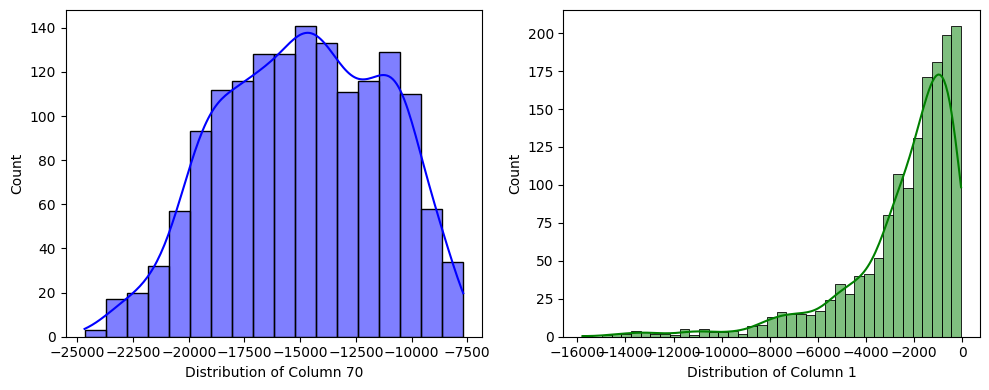

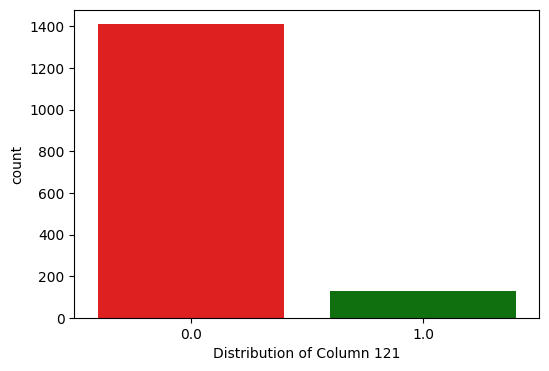

In [17]:
#I drew a histogram chart because the columns 70 and 1 have continuous values.
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(data=train, x=70, kde=True, color='blue')
plt.xlabel('Distribution of Column 70')
plt.subplot(1, 2, 2)
sns.histplot(data=train, x=1, kde=True, color='green')
plt.xlabel('Distribution of Column 1')
plt.tight_layout()
plt.show()

#I drew the bar chart because my target column named 121 has binary values.
plt.figure(figsize=(6, 4))
sns.countplot(x=121, data=train, palette=['red', 'green'])
plt.xlabel('Distribution of Column 121')
plt.show()


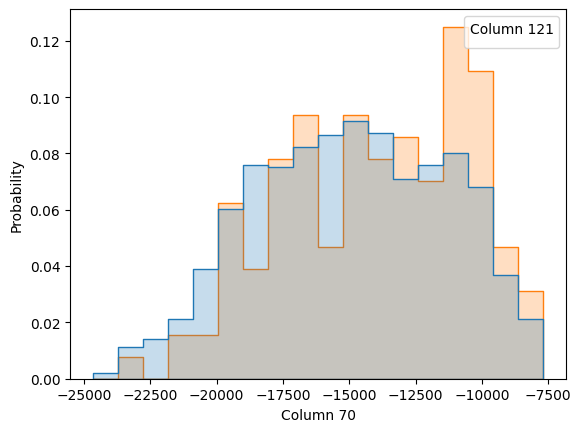

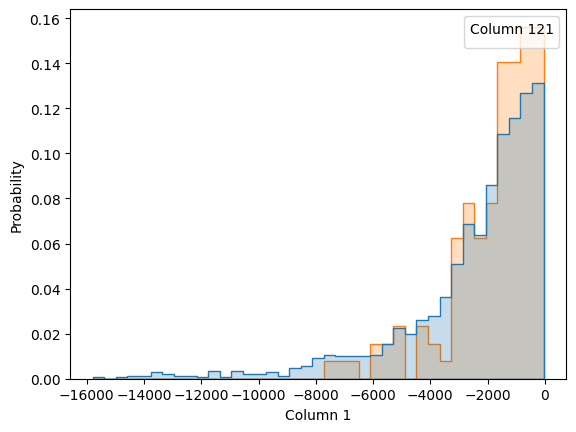

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

#I drew a histogram chart to see the relationship between column 70 and column 121.
sns.histplot(data=train, x=70, hue=121, element="step", stat="probability", common_norm=False)
plt.xlabel('Column 70')
plt.legend(title='Column 121')
plt.show()

#I drew a histogram chart to see the relationship between column 1 and column 121.
sns.histplot(data=train, x=1, hue=121, element="step", stat="probability", common_norm=False)
plt.xlabel('Column 1')
plt.legend(title='Column 121')
plt.show()


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#I separated the independent variables and the target variable.
X = train[[70, 1]]
y = train[121]

#I split the data into training and testing sets
x = train.drop([121], axis=1)
y = train[121]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#I printed the classification report.
print(classification_report(y_test, y_pred))

#In this part, I wrote this code to evaluate the performance of the columns I'm comparing. I also obtained metrics of the model such as accuracy, precision, recall and F1 scores.

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       275
         1.0       0.00      0.00      0.00        33

    accuracy                           0.89       308
   macro avg       0.45      0.50      0.47       308
weighted avg       0.80      0.89      0.84       308



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
